# Hands-on Machine Learning - (ML) Lab

## Data Cleaning

In [ ]:
import nltk
from nltk.tokenize import word_tokenize  
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import *
import pandas as pd
import spacy
from wordcloud import WordCloud, STOPWORDS
#from spacy.util import minibatch, compounding
import re
import random

import spacy
import pandas as pd
import matplotlib.pyplot as plt
import spacy
from wordcloud import WordCloud, STOPWORDS
from spacy.util import minibatch, compounding

In [ ]:
def preprocessing(filename):
    with open(filename, "r") as f:
        Input = f.readlines() 
        Abs_lines = "" 
        Abs_samples = []
        for line in Input:
            if line.startswith("###"):
                ID = line
                Abs_lines = "" 
            elif line.isspace(): 
                Abs_line_split = Abs_lines.splitlines()
                for Abs_line_number, Abs_line in enumerate(Abs_line_split):
                    line_data = {} 
                    part_text_split = Abs_line.split("\t") 
                    line_data["part"] = part_text_split[0]
                    line_data["text"] = part_text_split[1].lower() 
                    line_data["line_number"] = Abs_line_number 
                    line_data["total_numb_lines"] = len(Abs_line_split) - 1 
                    Abs_samples.append(line_data) 
            else:
                Abs_lines += line
    return Abs_samples

In [ ]:
# can be used if uploading by colab
from google.colab import files
uploaded = files.upload()

Saving dev_20k.txt to dev_20k.txt


In [ ]:
train = preprocessing(PubMed_20k_train)
Train_dframe = pd.DataFrame(train)
Train_dframe

,part,text,line_number,total_numb_lines
0,OBJECTIVE,to investigate the efficacy of 6 weeks of dail...,0,11
1,METHODS,a total of 125 patients with primary knee oa w...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
...,...,...,...,...
180035,RESULTS,for the absolute change in percent atheroma vo...,7,11
180036,RESULTS,"for pav , a significantly greater percentage o...",8,11
180037,RESULTS,both strategies had acceptable side effect pro...,9,11
180038,CONCLUSIONS,"compared with standard statin monotherapy , th...",10,11


In [ ]:
test = preprocessing(PubMed_20k_test)
Test_dframe = pd.DataFrame(test)
Test_dframe

,part,text,line_number,total_numb_lines
0,BACKGROUND,this study analyzed liver function abnormaliti...,0,8
1,RESULTS,a post hoc analysis was conducted with the use...,1,8
2,RESULTS,liver function tests ( lfts ) were measured at...,2,8
3,RESULTS,survival analyses were used to assess the asso...,3,8
4,RESULTS,the percentage of patients with abnormal lfts ...,4,8
...,...,...,...,...
30130,RESULTS,there was a statistically significant between-...,13,17
30131,RESULTS,there were no statistically significant betwee...,14,17
30132,RESULTS,there was no significant association between s...,15,17
30133,RESULTS,no adverse effects were reported .,16,17


In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize  
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import *

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


Tokenization, stemming, lemmatization and filter stopwords

In [ ]:
p_stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()
stemedList = []

def NLP_pipeline(text):

  # tokenization
    wordlist = word_tokenize(text)

  # stemming
  #wordlist = [p_stemmer.stem(word) for word in wordlist]

  # Lemmatization
    wordlist = [wordnet_lemmatizer.lemmatize(word) for word in wordlist]

  # filter stopwords
    filtered_sentence =[] 
    for word in wordlist:
        lexeme = nlp.vocab[word]
        if lexeme.is_stop == False:
            filtered_sentence.append(word) 
    wordlist = filtered_sentence

     text = ' '.join(wordlist)
  return text

### data cleaning on train and test datasets

In [ ]:
text_train = Train_dframe['text']
text_test = Test_dframe['text']
Train_dframe['clean_data'] = Train_dframe['text'].apply(lambda x: NLP_pipeline(x))
Test_dframe['clean_data'] = Test_dframe['text'].apply(lambda x: NLP_pipeline(x))

In [ ]:
Train_dframe

,part,text,line_number,total_numb_lines,clean_data
0,OBJECTIVE,to investigate the efficacy of 6 weeks of dail...,0,11,investigate efficacy 6 week daily low-dose ora...
1,METHODS,a total of 125 patients with primary knee oa w...,1,11,total 125 patient primary knee oa randomized 1...
2,METHODS,outcome measures included pain reduction and i...,2,11,outcome measure included pain reduction improv...
3,METHODS,pain was assessed using the visual analog pain...,3,11,pain wa assessed visual analog pain scale ( 0-...
4,METHODS,secondary outcome measures included the wester...,4,11,secondary outcome measure included western ont...
...,...,...,...,...,...
180035,RESULTS,for the absolute change in percent atheroma vo...,7,11,absolute change percent atheroma volume ( pav ...
180036,RESULTS,"for pav , a significantly greater percentage o...",8,11,"pav , significantly greater percentage patient..."
180037,RESULTS,both strategies had acceptable side effect pro...,9,11,"strategy acceptable effect profile , low incid..."
180038,CONCLUSIONS,"compared with standard statin monotherapy , th...",10,11,"compared standard statin monotherapy , combina..."


In [ ]:
Test_dframe

,part,text,line_number,total_numb_lines,clean_data
0,BACKGROUND,this study analyzed liver function abnormaliti...,0,8,study analyzed liver function abnormality hear...
1,RESULTS,a post hoc analysis was conducted with the use...,1,8,post hoc analysis wa conducted use data evalua...
2,RESULTS,liver function tests ( lfts ) were measured at...,2,8,liver function test ( lfts ) measured 7 time p...
3,RESULTS,survival analyses were used to assess the asso...,3,8,survival analysis ass association admission mo...
4,RESULTS,the percentage of patients with abnormal lfts ...,4,8,percentage patient abnormal lfts decreased sig...
...,...,...,...,...,...
30130,RESULTS,there was a statistically significant between-...,13,17,wa statistically significant between-group dif...
30131,RESULTS,there were no statistically significant betwee...,14,17,statistically significant between-group differ...
30132,RESULTS,there was no significant association between s...,15,17,wa significant association satisfaction treatm...
30133,RESULTS,no adverse effects were reported .,16,17,adverse effect reported .


## Vectorize text

Bag of Words(BoW): converts text into the matrix of occurrence of words within a given document.


scikit-learn‘s CountVectorizer: generate a BoW matrix.


ngram_range parameter: 1: unigrams would be a sequence of single words;

2 Bigram: a sequence of 2 contiguous words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
vectorizer = CountVectorizer(ngram_range=(1,1), max_features=1000)

TF-IDF (Term Frequency-Inverse Document Frequency): Normalizing Bag of Words(BoW) by looking at each word’s frequency in comparison to the document frequency. The higher the TF-IDF, the more important that term is to that document.

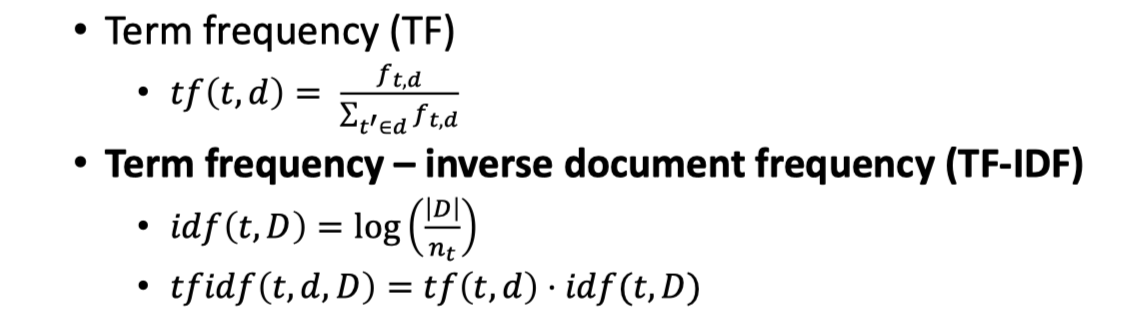

## Model Training

x_train, x_test, y_train, y_test

In [ ]:
# train set feature:
x_train = Train_dframe['clean_data']
# train set label:
y_train = Train_dframe['part']
# test set feature:
x_test = Test_dframe['clean_data']
# test set label:
y_test = Test_dframe['part']

## create a pipeline and generate models

logistic regression

In [ ]:
# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

logistic = LogisticRegression(verbose=1, solver='liblinear',random_state=0, C=5, penalty='l2',max_iter=1000)

# Create pipeline using Bag of Words
pipe = Pipeline([('vectorizer', vectorizer),('classifier', logistic)])

# model generation
pipe.fit(x_train,y_train)

[LibLinear]

Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=1000, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=5, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
              

random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(max_depth=100, random_state=0)

pipe_randomforest = Pipeline([('vectorizer', vectorizer),('classifier', randomforest)])
pipe_randomforest.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=1000, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabula...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=100, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                 

Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

pipe_clf = Pipeline([('vectorizer', vectorizer),('classifier', clf)])
pipe_clf.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=1000, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

### Generate predictions for the test dataset

In [ ]:
from sklearn import metrics
# Predicting with a test dataset
predicted = pipe.predict(x_test)

In [ ]:
predicted_forest = pipe_randomforest.predict(x_test)

In [ ]:
#logistic regression
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

  BACKGROUND       0.56      0.48      0.51      3621
 CONCLUSIONS       0.62      0.58      0.60      4571
     METHODS       0.75      0.87      0.81      9897
   OBJECTIVE       0.64      0.45      0.52      2333
     RESULTS       0.82      0.82      0.82      9713

    accuracy                           0.73     30135
   macro avg       0.68      0.64      0.65     30135
weighted avg       0.72      0.73      0.72     30135



In [ ]:
#random forest
print(classification_report(y_test, predicted_forest))

              precision    recall  f1-score   support

  BACKGROUND       0.50      0.55      0.52      3621
 CONCLUSIONS       0.62      0.51      0.56      4571
     METHODS       0.75      0.87      0.81      9897
   OBJECTIVE       0.67      0.43      0.52      2333
     RESULTS       0.82      0.79      0.80      9713

    accuracy                           0.72     30135
   macro avg       0.67      0.63      0.64     30135
weighted avg       0.71      0.72      0.71     30135



In [ ]:
#naive bayes
predicted_clf = pipe_clf.predict(x_test)
print(classification_report(y_test, predicted_clf))

              precision    recall  f1-score   support

  BACKGROUND       0.49      0.49      0.49      3621
 CONCLUSIONS       0.55      0.61      0.58      4571
     METHODS       0.77      0.82      0.79      9897
   OBJECTIVE       0.52      0.50      0.51      2333
     RESULTS       0.84      0.75      0.79      9713

    accuracy                           0.70     30135
   macro avg       0.63      0.63      0.63     30135
weighted avg       0.71      0.70      0.70     30135



### The accuracy for logistic regression, random forest and naive_bayes are 0.73, 0.72 and 0.70.

### Visualization of benchmarking results

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
precision,recall,fscore,support=score(y_test,predicted)
precision_rf, recall_rf, fscore_rf,support_rf=score(y_test,predicted_forest)
precision_nb, recall_nb, fscore_nb, support_nb = score(y_test, predicted_clf)

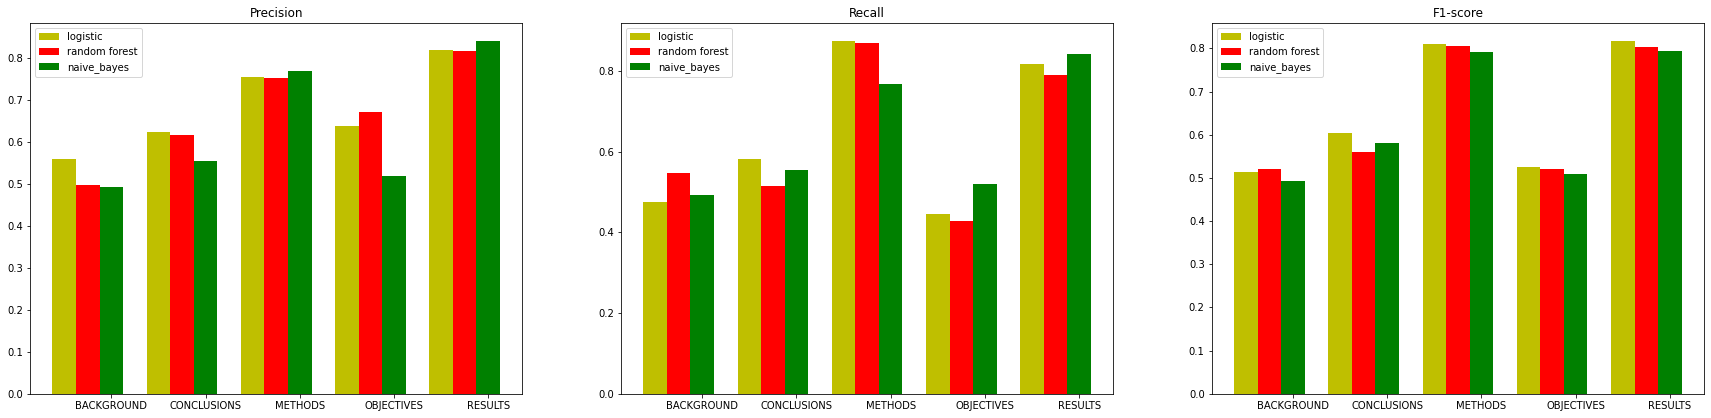

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
 
name_list = ['BACKGROUND','CONCLUSIONS','METHODS','OBJECTIVES','RESULTS']


x = np.arange(len(name_list)) 
width = 0.25 

plt.figure(figsize=(30,15))

plt.subplot(231)
plt.title('Precision')
plt.bar(x-width , precision, width, label='logistic',tick_label = name_list,fc = 'y')
plt.bar(x, precision_rf, width, label='random forest',tick_label = name_list,fc = 'r')
plt.bar(x + width, precision_nb, width, label='naive_bayes',tick_label = name_list,fc = 'g')
plt.legend()

plt.subplot(232)
plt.title('Recall')
plt.bar(x - width, recall, width, label='logistic',tick_label = name_list,fc = 'y')
plt.bar(x, recall_rf, width, label='random forest',tick_label = name_list,fc = 'r')
plt.bar(x + width, precision_nb, width, label='naive_bayes',tick_label = name_list,fc = 'g')
plt.legend()

plt.subplot(233)
plt.title('F1-score')
plt.bar(x - width, fscore, width, label='logistic',tick_label = name_list,fc = 'y')
plt.bar(x, fscore_rf, width, label='random forest',tick_label = name_list,fc = 'r')
plt.bar(x + width, fscore_nb, width, label='naive_bayes',tick_label = name_list,fc = 'g')

plt.legend()
plt.show()


## Conclusion

Concluding from the plot, logistic regression performs the best. And according to the precision result, ‘results’ are get accurately classified.